In [ ]:
import numpy as np
import math

# Array creation

When creating an array we pass a **list as argument**

In [ ]:
my_list = [1, 2]

a = np.array(my_list)

print(type(a))
print(a.ndim)

<class 'numpy.ndarray'>
1


![](https://i.stack.imgur.com/NWTQH.png)

![](https://storage.googleapis.com/lds-media/images/numpy-vector-matrix-3d-matrix.width-1200.jpg)

In [ ]:
my_matrix = [[1.3, 2 , 3], [4, 5, 6]]
my_array = np.array(my_matrix)
print(my_array.ndim)
print(my_array.shape)

2
(2, 3)


In [ ]:
# We can also check the type of elements in the array
my_array.dtype

dtype('float64')

How to create arrays with initial placeholders when we initially know the shape but not the values it will contain

In [ ]:
zero_matrix = np.zeros((2, 3))
print(zero_matrix)

one_matrix = np.ones((2, 3))
print(one_matrix)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


We can do the same with random numbers


In [ ]:
random_matrix = np.random.rand(2, 3)
print(random_matrix)
np.random.rand(2, 3)

[[0.38607919 0.23007616 0.51246135]
 [0.93672342 0.42087701 0.43480895]]


array([[0.78142008, 0.86514029, 0.86888434],
       [0.062049  , 0.30157756, 0.30230217]])

We can create a sequence of numbers in an array with **arange**. The function needs 3 arguments, the first (inclusive), is the beginning of the sequence. The second argument is the end of the sequence (exclusive). Finally, the **third** argument is the **step**

In [ ]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

The **number** of elements that the **linspace** function creates, is dictated by the **third** argument. The first 2 arguments are both inclusive. The following code says: Create 5 float numbers that are within the 0 and 2:

In [ ]:
np.linspace(0, 2, 5)

array([0. , 0.5, 1. , 1.5, 2. ])

# Array operations
> Arithmetic operators on an array apply elementwise

In [ ]:
list_a = [10, 20, 30, 40]
list_b = [1, 2, 3, 4]

a = np.array(list_a)
b = np.array(list_b)

c = a - b
print(c)

[ 9 18 27 36]


Exercise: Farenheit to Celsius
The formula is: C = (F - 32) * 5/9

In [ ]:
farenheit_list = [0, -10, -15, -5, 0]
farenheit_array = np.array(farenheit_list)
celsius = (farenheit_array - 32) * (5/9)
print(celsius)

[-17.77777778 -23.33333333 -26.11111111 -20.55555556 -17.77777778]


Boolean array

In [ ]:
celsius > - 20

array([ True, False, False, False,  True])

Besides elementwise manipulation, numpy supports matrix manipulation. If we want to do elementwise product we use the asterisk

In [ ]:
matrix_a = [[1, 1],[0, 1]]
matrix_b = [[2, 0],[3, 4]]

A = np.array(matrix_a)
B = np.array(matrix_b)

A*B

array([[2, 0],
       [0, 4]])

If you want to do matrix multiplication, then you use the @ sign or use the dot product

In [ ]:
A@B

array([[5, 4],
       [3, 4]])

Some functions you can apply on arrays:

In [ ]:
list1 = [1, 2, 3, 4]
array1 = np.array(list1)

print(array1.min())
print(array1.max())
print(array1.mean())
print(array1.sum())

1
4
2.5
10


We can **reshape** matrices

In [ ]:
b = np.arange(1, 16, 1).reshape(5,3)
b

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

PIL - Python Imaging Library

In [ ]:
from PIL import Image
from IPython.display import display
from urllib.request import urlopen

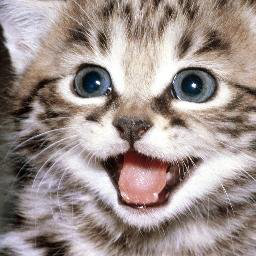

In [ ]:

im = Image.open(urlopen('https://pbs.twimg.com/profile_images/664169149002874880/z1fmxo00_400x400.jpg'))
display(im)

Now we are going to transform the previous PIL image into an array

In [ ]:
arrayImage = np.array(im)
arrayImage.shape


(256, 256, 3)

![](https://static.platzi.com/media/user_upload/imagen1-28893471-cab6-4355-931d-a64879100023.jpg)
El bit es la unidad mínima de información que se usa en informática, este puede tener dos estados: uno o cero y comúnmente están asociados a que un dispositivo se encuentre apagado o encendido.

uint8 means each value of the image can be up to $2^8$

In [ ]:
mask = np.full(arrayImage.shape, 255) # When using "full", you need to pass the array that you want to imitate its shape
inverted_array = mask-arrayImage
inverted_array = inverted_array.astype(np.uint8) # uint means unasigned integer and 8 means 8 bits per byte


Now, transform the numpy array into an object image that jupyter can render with **fromarray**

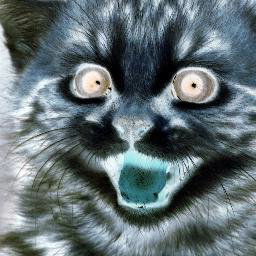

In [ ]:
display(Image.fromarray(inverted_array))

Now let's reshape the image, how it will look like?

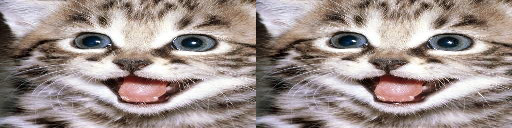

In [ ]:
reshaped_image = arrayImage.reshape(128, 512, 3)
display(Image.fromarray(reshaped_image))

# Indexing, slicing and iterating
These techniques are very important as they allow us to select data based on conditions and copy or update data

## Indexing

In [ ]:
a = np.array([5, 9, 13, 7])
a[2] # This works like in a normal Python list

13

In [ ]:
b = np.array([[2, 1],[3,4]])
b[1][1]

4

In [ ]:
a = np.array([[1,2],[3,4],[5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
print(a[[0,1,2],[0,1,1]])

[1 4 6]


## Boolean indexing
With boolean indexing we can select elements based on conditions

In [ ]:
a>5

array([[False, False],
       [False, False],
       [False,  True]])

We can then place this array of booleans like a mask over the original array to return a one-dimensional

In [ ]:
a[a>4]

array([5, 6])

# Slicing
Slicing is a way to create a sub-array based on the original array. For 1 dimensional array, slicing in numpy works similar to slicing in normal python list

In [ ]:
# Slicing in normal python list
python_list = [1,2, 3, 4, 5, 6]
sub_list = python_list[0:3]
sub_list

[1, 2, 3]

In [ ]:
# Slicing in numpy
numpy_array = np.array(python_list)
sub_array = numpy_array[0:3]
sub_array

array([1, 2, 3])

In [ ]:
# Slicing multi-dimensional numpy arrays
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
a[0:2]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
a[0:2, 1:3] # first argument select the rows, second argument select the columns

array([[2, 3],
       [6, 7]])

Modifying the sub-array wil modify the original array

In [ ]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
sub_array = a[0:2, 1:3]
print(sub_array[0,0])

2


In [ ]:
sub_array[0,0]=50

In [ ]:
a

array([[ 1, 50,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

# Trying numpy with datasets
We are going to use the function **genfromtxt** to load a dataset in numpy


In [ ]:
wines = np.genfromtxt(urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'), delimiter=";", skip_header=1)
wines


array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

Now select the acidity column (the first column)

In [ ]:
acidity = wines[:,0] # Here we say, we want only one column, the zero column
acidity

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

If we want to preserve that the values sit in their own raws

In [ ]:
acidity2 = wines[:, 0:1] # here we say we want all the columns between index 0 and 1
acidity2

array([[7.4],
       [7.8],
       [7.8],
       ...,
       [6.3],
       [5.9],
       [6. ]])

If we want several coulumns from the wines dataset:

In [ ]:
some_columns_wine = wines[:, 0:3]
some_columns_wine

array([[7.4  , 0.7  , 0.   ],
       [7.8  , 0.88 , 0.   ],
       [7.8  , 0.76 , 0.04 ],
       ...,
       [6.3  , 0.51 , 0.13 ],
       [5.9  , 0.645, 0.12 ],
       [6.   , 0.31 , 0.47 ]])

But what if we want **non-consecutive** columns?
You create an array with the numbers of the columns you want, and you pass it as the second argument

In [ ]:
# I want columns 0, 2 and 4
columns_I_want = np.array([0, 2, 4])
wine_non_consecutive = wines[:, columns_I_want]
wine_non_consecutive 

array([[7.4  , 0.   , 0.076],
       [7.8  , 0.   , 0.098],
       [7.8  , 0.04 , 0.092],
       ...,
       [6.3  , 0.13 , 0.076],
       [5.9  , 0.12 , 0.075],
       [6.   , 0.47 , 0.067]])

We can do basic summarization. For example, let's find the average quality of red wine (last column)

In [ ]:
wines[:,-1].mean()

5.6360225140712945

Now we are going to work with another dataset on graduate school admissions

In [ ]:
graduate_admission = np.genfromtxt(urlopen('https://raw.githubusercontent.com/divyansha11
/Graduate-Admission-Prediction/master/Admission_Predict.csv'), delimiter=",", skip_header=1, names=('Serial No', 'GRE Score','TOEFL Score','University Rating','SOP','LOR' ,'CGPA','Research', 'Chance of Admit' ))

graduate_admission 

array([(  1., 337., 118., 4., 4.5, 4.5, 9.65, 1., 0.92),
       (  2., 324., 107., 4., 4. , 4.5, 8.87, 1., 0.76),
       (  3., 316., 104., 3., 3. , 3.5, 8.  , 1., 0.72),
       (  4., 322., 110., 3., 3.5, 2.5, 8.67, 1., 0.8 ),
       (  5., 314., 103., 2., 2. , 3. , 8.21, 0., 0.65),
       (  6., 330., 115., 5., 4.5, 3. , 9.34, 1., 0.9 ),
       (  7., 321., 109., 3., 3. , 4. , 8.2 , 1., 0.75),
       (  8., 308., 101., 2., 3. , 4. , 7.9 , 0., 0.68),
       (  9., 302., 102., 1., 2. , 1.5, 8.  , 0., 0.5 ),
       ( 10., 323., 108., 3., 3.5, 3. , 8.6 , 0., 0.45),
       ( 11., 325., 106., 3., 3.5, 4. , 8.4 , 1., 0.52),
       ( 12., 327., 111., 4., 4. , 4.5, 9.  , 1., 0.84),
       ( 13., 328., 112., 4., 4. , 4.5, 9.1 , 1., 0.78),
       ( 14., 307., 109., 3., 4. , 3. , 8.  , 1., 0.62),
       ( 15., 311., 104., 3., 3.5, 2. , 8.2 , 1., 0.61),
       ( 16., 314., 105., 3., 3.5, 2.5, 8.3 , 0., 0.54),
       ( 17., 317., 107., 3., 4. , 3. , 8.7 , 0., 0.66),
       ( 18., 319., 106., 3., 4

Let's take the 5 first students by the name of a column

In [ ]:
graduate_admission['CGPA'][0:5]

array([9.65, 8.87, 8.  , 8.67, 8.21])

Let's scale the GPA from the EU system (0 to 10) to USA system (0 to 4)

In [ ]:
graduate_admission['CGPA'] = graduate_admission['CGPA'] /10 *4
graduate_admission['CGPA'][0:5]

array([3.86 , 3.548, 3.2  , 3.468, 3.284])

Let's create a boolean mask to find out how many students have research experience

In [ ]:
len(graduate_admission) # First, how many students do we have in the original list

400

In [ ]:
len(graduate_admission[graduate_admission['Research'] == 1]) # With len we count how many have research

219

Now let's answer the question, what is the mean GPA of the students with higher and lower chances of getting admitted?

In [ ]:

print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['CGPA'].mean()) 
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['CGPA'].mean())

3.7106666666666666
3.0222857142857142


# MANIPULATING TEXT WITH REGULAR EXPRESSIONS

Regular expression = regex = pattern of text 
Use cases:
1. Check if as text contains a pattern
2. Retrive all instances of a complex pattern
3. Clean text


Let's import the module re, where python stores regular expressions libraries

In [ ]:
import re

re has several interesting functions:
- match()
- search()

In [ ]:
text = "Today is a good day"
if re.search("good", text):
  print("eii")
else:
  print("buuh")

eii


Tokenize: Separate a string in substrings based on patterns. The functions...
- findall()
- split()
... will parse (analizar sintácticamente)  and return chunks


In [ ]:
text = "Amy works well. Amy gets good grades. Our student Amy is successful."
re.split("Amy", text)

['', ' works well. ', ' gets good grades. Our student ', ' is successful.']

In [ ]:
len(re.findall("Amy", text))

3

# Anchors
Anchors specify the start and/or the end of the string that you are tryin to match.
- The **caret** character ^ means **start**
- The **dollar** character $ means **end**

In [ ]:
text = "Amy works well. Amy gets good grades. Our student Amy is successful."
print(re.search("^Amy", text))

<re.Match object; span=(0, 3), match='Amy'>


`re.search()` returns a new `re.Match` object which always has a boolean value of True, so you can evaluate it in a if statement

# Patters: Character Classes

In [ ]:
student_grades = "ABACBAAABBCCABCBCBAACB"

How many "A" are in the list?

In [ ]:
len(re.findall("A", student_grades))

8

But, what if we want to count the number of A's and B's? We write them inside squared brakets
- **Set operator** "[]"

In [ ]:
re.findall("[AB]", student_grades)# [] = 1 set of characters

['A',
 'B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B']

With the set operator you can also include a range of characters. For example, to refer to all the lowercase alphabet we can do [a-z]. From the previous list, to get all the A grades followd by B or C:


In [ ]:
re.findall("[A][B-C]", student_grades) # [][] = 2 sets of characters

['AB', 'AC', 'AB', 'AB', 'AC']

You can rewrite the previous as with:
- **pipe** operator |

In [ ]:
re.findall("AB|AC", student_grades) 

['AB', 'AC', 'AB', 'AB', 'AC']

Use the **caret ^** with the **set []** operator to **negate** results. Example: retrieve every grade different from A
Important!: Inside the set operator, the caret ^ changes its meaning!

In [ ]:
re.findall("[^A]", student_grades)

['B', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'B']

# Quantifiers
Quantifiers: Number of times you want a pattern to be mach. The most basic quantifier is expressed as **e{m,n}**

Where 
- **e** = expression or character we are matching
- **m** = is the minimum number of times you want it to be matched  
- **n** = is the maximum number of times


In [ ]:
re.findall("A{2,10}", student_grades)

['AAA', 'AA']

There are more quantifiers:
- Asterisk * matches 0 or more times
- Question mark **?** matches 1 or more times
- Plus sign + matches 1 or more times

In [ ]:
with urlopen("https://raw.githubusercontent.com/yonycherkos/Applied-Data-Science-with-Python-Specialization/main/Course%20-%201%3A%20Introduction%20to%20Data%20Science%20in%20Python/resources/week-1/datasets/ferpa.txt") as file:
  wiki = str(file.read())
wiki
print(type(wiki))


<class 'str'>


Scanning the document we see that all the headers have the word **[edit]\n** behind.
Get a list with all the headers:
We are interested in all the characters [a-zA-Z] that are lowercase a to z or capitalcase A to Z. We are interested in somewhere  between 1 and 100 of those charecters {1, 100} as long as they are followed by edit (**e{m,n}**)

In [ ]:
re.findall("[a-zA-Z]{1,100}\[edit\]", wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

These gave us only the last word of each header
Metacharacters:
- \w matches any letter including digits and numbers
- \s matches any whitespace character

We can also shorten the curly brace syntax with *, to match 0 or more times

In [ ]:
re.findall("[\w]{1,100}\[edit\]", wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

In [ ]:
re.findall("[\w]*\[edit\]", wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

Now that we have shortened the regex we can improving adding spaces


In [ ]:
re.findall("[\w ]*\[edit\]", wiki)

['Overview[edit]',
 'nAccess to public records[edit]',
 'nStudent medical records[edit]']

We can iterate through the previous list and apply another regex:

In [ ]:
for title in re.findall("[\w ]*\[edit\]", wiki):
  
  print(re.split("[\[]", title)[0])

Overview
nAccess to public records
nStudent medical records


# Groups
We can match different patterns called groups, at the same time and then refer to the groups you want. To group patterns together you use **parentheses**


In [ ]:
re.findall("([\w ]*)(\[edit\])", wiki)

[('Overview', '[edit]'),
 ('nAccess to public records', '[edit]'),
 ('nStudent medical records', '[edit]')]

What do we do if we want a list of Match objects?

In [ ]:
for item in re.finditer("([\w ]*)(\[edit\])", wiki):
  print(item.groups())

('Overview', '[edit]')
('nAccess to public records', '[edit]')
('nStudent medical records', '[edit]')


The groups() method returns a tuple of the group. We can get a individual group using group(number)

In [ ]:
for item in re.finditer("([\w ]*)(\[edit\])", wiki):
  print(item.group(1))


Overview
nAccess to public records
nStudent medical records


In [ ]:
for item in re.finditer("(?P<title>[\w ]*)(?P<edit_link>\[edit\])",wiki):
    # We can get the dictionary returned for the item with .groupdict()
    print(item.groupdict()['title'])

Overview
nAccess to public records
nStudent medical records


In [ ]:
print(item.groupdict())

{'title': 'nStudent medical records', 'edit_link': '[edit]'}


Other shortcuts:
- **.** (period) for single character which is not a newline
- \d for any digit

# Look-ahead and Look-behind

In [ ]:
for item in re.finditer("(?P<title>[\w ]+)(?=\[edit\])",wiki):
    # What this regex says is match two groups, the first will be named and called title, will have any amount
    # of whitespace or regular word characters, the second will be the characters [edit] but we don't actually
    # want this edit put in our output match objects
    print(item)

<re.Match object; span=(2, 10), match='Overview'>
<re.Match object; span=(2743, 2768), match='nAccess to public records'>
<re.Match object; span=(3726, 3750), match='nStudent medical records'>


Let's play with another file, an article from Wikipedia about Buddisht universities in USA.

In [ ]:
wiki = urlopen("https://raw.githubusercontent.com/yonycherkos/Applied-Data-Science-with-Python-Specialization/main/Course%20-%201%3A%20Introduction%20to%20Data%20Science%20in%20Python/resources/week-1/datasets/buddhist.txt")
wiki2 = str(wiki.read(), 'utf-8')
print(wiki2)


Buddhist universities and colleges in the United States
From Wikipedia, the free encyclopedia
Jump to navigationJump to search

This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.
Find sources: "Buddhist universities and colleges in the United States" – news · newspapers · books · scholar · JSTOR (December 2009) (Learn how and when to remove this template message)
There are several Buddhist universities in the United States. Some of these have existed for decades and are accredited. Others are relatively new and are either in the process of being accredited or else have no formal accreditation. The list includes:

Dhammakaya Open University – located in Azusa, California, part of the Thai Wat Phra Dhammakaya[1]
Dharmakirti College – located in Tucson, Arizona Now called Awam Tibetan Buddhist Institute (http://awaminstitute.org/)
Dharma Realm Buddhist Univers

# Verbose mode
The verbose mode allows you to write multi-line regexes. For this mode we have to explicitly specify white spaces:
- Option 1: Prepending them with a \ (attach \ at the beginning of a whitespace)
- Option 2: Using \s

With this mode, we can even comment the regex!
This mode is much easier to read

In [ ]:
pattern = """
(?P<title>.*)  # Group 1: University title , any number of characters (.*)
(–\ located\ in\ ) # Group 2: Location: "Institute of Buddhist Studies – located in Berkeley, California"
(?P<city>\w*)  # Group 3: City
(,\ )  # Group 4: Separator for the state. Because i dont care about this group i do not name it
(?P<state>\w*) 
"""

In [ ]:
for item in re.finditer(pattern,wiki2,re.VERBOSE):
    # We can get the dictionary returned for the item with .groupdict()
    print(item.groupdict())

{'title': 'Dhammakaya Open University ', 'city': 'Azusa', 'state': 'California'}
{'title': 'Dharmakirti College ', 'city': 'Tucson', 'state': 'Arizona'}
{'title': 'Dharma Realm Buddhist University ', 'city': 'Ukiah', 'state': 'California'}
{'title': 'Ewam Buddhist Institute ', 'city': 'Arlee', 'state': 'Montana'}
{'title': 'Institute of Buddhist Studies ', 'city': 'Berkeley', 'state': 'California'}
{'title': 'Maitripa College ', 'city': 'Portland', 'state': 'Oregon'}
{'title': 'University of the West ', 'city': 'Rosemead', 'state': 'California'}
{'title': 'Won Institute of Graduate Studies ', 'city': 'Glenside', 'state': 'Pennsylvania'}


# Example New York Times

In [ ]:
article = urlopen("https://raw.githubusercontent.com/yonycherkos/Applied-Data-Science-with-Python-Specialization/main/Course%20-%201%3A%20Introduction%20to%20Data%20Science%20in%20Python/resources/week-1/datasets/nytimeshealth.txt")
article2 = str(article.read(), 'utf-8')
article2

'548662191340421120|Sat Dec 27 02:10:34 +0000 2014|Risks in Using Social Media to Spot Signs of Mental Distress http://nyti.ms/1rqi9I1\r\n548579831169163265|Fri Dec 26 20:43:18 +0000 2014|RT @paula_span: The most effective nationwide diabetes prevention program you\'ve probably never heard of:  http://newoldage.blogs.nytimes.com/2014/12/26/diabetes-prevention-that-works/\r\n548579045269852161|Fri Dec 26 20:40:11 +0000 2014|The New Old Age Blog: Diabetes Prevention That Works http://nyti.ms/1xm7fTi\r\n548444679529041920|Fri Dec 26 11:46:15 +0000 2014|Well: Comfort Casseroles for Winter Dinners http://nyti.ms/1xTNoO0\r\n548311901227474944|Fri Dec 26 02:58:39 +0000 2014|High-Level Knowledge Before Veterans Affairs Scandal http://nyti.ms/13yCpvS\r\n548305625449787392|Fri Dec 26 02:33:42 +0000 2014|Your Money: Affordable Care Act’s Tax Effects Now Loom for Filers http://nyti.ms/13yAtUf\r\n548283182853160960|Fri Dec 26 01:04:32 +0000 2014|Well: Christmas in the Hospital http://nyti.ms/1vtPNc

We see that there are tweets separated by pipes |. Get all the hashtags in one list

In [ ]:
pattern = '#[\w\d]*(?=\s)'

In [ ]:
re.findall(pattern, article2)

['#askwell',
 '#pregnancy',
 '#Colorado',
 '#VegetarianThanksgiving',
 '#FallPrevention',
 '#Ebola',
 '#Ebola',
 '#ebola',
 '#Ebola',
 '#Ebola',
 '#EbolaHysteria',
 '#AskNYT',
 '#Ebola',
 '#Ebola',
 '#Liberia',
 '#Excalibur',
 '#ebola',
 '#Ebola',
 '#dallas',
 '#nobelprize2014',
 '#ebola',
 '#ebola',
 '#monrovia',
 '#ebola',
 '#nobelprize2014',
 '#ebola',
 '#nobelprize2014',
 '#Medicine',
 '#Ebola',
 '#Monrovia',
 '#Ebola',
 '#smell',
 '#Ebola',
 '#Ebola',
 '#Ebola',
 '#Monrovia',
 '#Ebola',
 '#ebola',
 '#monrovia',
 '#liberia',
 '#benzos',
 '#ClimateChange',
 '#Whole',
 '#Wheat',
 '#Focaccia',
 '#Tomatoes',
 '#Olives',
 '#Recipes',
 '#Health',
 '#Ebola',
 '#Monrovia',
 '#Liberia',
 '#Ebola',
 '#Ebola',
 '#Liberia',
 '#Ebola',
 '#blood',
 '#Ebola',
 '#organtrafficking',
 '#EbolaOutbreak',
 '#SierraLeone',
 '#Freetown',
 '#SierraLeone',
 '#ebolaoutbreak',
 '#kenema',
 '#ebola',
 '#Ebola',
 '#ebola',
 '#ebola',
 '#Ebola',
 '#ASMR',
 '#AIDS2014',
 '#AIDS',
 '#MH17',
 '#benzos']

Check Regular Expression Operations documentation https://docs.python.org/3/library/re.html

# Assignment 1

In [ ]:
from re import findall
import re
def names():
    simple_string = """Amy is 5 years old, and her sister Mary is 2 years old. 
    Ruth and Peter, their parents, have 3 kids."""


    result = re.findall('[A-Z][a-z]+',simple_string)
    print(result)


    # YOUR CODE HERE
    return result
    
    #raise NotImplementedError()

In [ ]:
if len(names()) == 4:
  print('yey')
else:
  print('buuu')

['Amy', 'Mary', 'Ruth', 'Peter']
buuu


## Part B

In [ ]:
from re import VERBOSE
import re
def grades():
    with open ("grades.txt", "r") as file:
        grades = file.read()

    pattern = """
    (?P<name>[A-Z][a-z]+\ [A-Z][a-z]+)
    (:\ B)
    
    """
    
    result = re.finditer(pattern, grades, re.VERBOSE)
    print(result)
    student_list = []
    for student in result:
      print(student.groupdict()['name'])
      student_list.append(student.groupdict()['name'])


    # YOUR CODE HERE
    return student_list
    #raise NotImplementedError()

In [ ]:
assert len(grades()) == 16

Bell Kassulke
Simon Loidl
Elias Jovanovic
Hakim Botros
Emilie Lorentsen
Jake Wood
Fatemeh Akhtar
Kim Weston
Yasmin Dar
Viswamitra Upandhye
Killian Kaufman
Elwood Page
Elodie Booker
Adnan Chen
Hank Spinka
Hannah Bayer


## Part C

In [ ]:
from re import finditer
import re
def logs():
    with open("logdata.txt", "r") as file:
        logdata = file.read()
    
    # YOUR CODE HERE ] "(?P<request>[A-Z]+)


    pattern = """
    (?P<host>[\d]+\.[\d]+\.[\d]+\.[\d]+)
    (\ \-\ )
    (?P<user_name>[\w]+|\-)
    (\ \[)
    (?P<time>[\d]+/[A-Z][a-z]+/[\d]{4}:[\d]{2}:[\d]{2}:[\d]{2}\ \-[\d]{4})
    (\]\ \")
    (?P<request>.*)
    (\".*)
    

    """
    result = re.finditer(pattern, logdata, re.VERBOSE)

    #my_dict = {"host":[], "user_name":[], "time":[], "request":[]}
    my_list = []
    for line in result:

  
      my_dict = {"host":line.groupdict()['host'], "user_name":line.groupdict()['user_name'], "time":line.groupdict()['time'], "request":line.groupdict()['request']}
      #my_dict = {"host":[line.groupdict()['host']]}
      
      my_list.append(my_dict)

      #print(my_list[0])
    

    
    return my_list
    #raise NotImplementedError()

In [ ]:
logs()

[{'host': '146.204.224.152',
  'request': 'POST /incentivize HTTP/1.1',
  'time': '21/Jun/2019:15:45:24 -0700',
  'user_name': 'feest6811'},
 {'host': '197.109.77.178',
  'request': 'DELETE /virtual/solutions/target/web+services HTTP/2.0',
  'time': '21/Jun/2019:15:45:25 -0700',
  'user_name': 'kertzmann3129'},
 {'host': '156.127.178.177',
  'request': 'DELETE /interactive/transparent/niches/revolutionize HTTP/1.1',
  'time': '21/Jun/2019:15:45:27 -0700',
  'user_name': 'okuneva5222'},
 {'host': '100.32.205.59',
  'request': 'PATCH /architectures HTTP/1.0',
  'time': '21/Jun/2019:15:45:28 -0700',
  'user_name': 'ortiz8891'},
 {'host': '168.95.156.240',
  'request': 'GET /engage HTTP/2.0',
  'time': '21/Jun/2019:15:45:31 -0700',
  'user_name': 'stark2413'},
 {'host': '71.172.239.195',
  'request': 'PUT /cutting-edge HTTP/2.0',
  'time': '21/Jun/2019:15:45:32 -0700',
  'user_name': 'dooley1853'},
 {'host': '180.95.121.94',
  'request': 'PATCH /extensible/reinvent HTTP/1.1',
  'time': '21

# Quiz 1

## Question 1

In [ ]:
import re
string = 'bat, lat, mat, bet, let, met, bit, lit, mit, bot, lot, mot'
result = re.findall('b[ao]t', string)
print(result)

['bat', 'bot']


## Question 2

In [ ]:
def l2_dist(a, b):
    result = ((a - b) * (a - b)).sum()
    result = result ** 0.5
    return result 

In [ ]:
a = np.random.rand(20, 20)
b = np.random.rand(20, 20)
print(l2_dist(a, b))
print(l2_dist(np.reshape(a, (20 * 20)), np.reshape(b, (20 * 20, 1))))
print(l2_dist(np.reshape(a, (20 * 20)), np.reshape(b, (20 * 20))))
print(l2_dist(a.T, b.T))


7.813638400759093
164.57169839989334
7.813638400759093
7.813638400759093


## Question 3

In [214]:
a1 = np.random.rand(4)
a2 = np.random.rand(4, 1)
a3 = np.array([[1, 2, 3, 4]])
a4 = np.arange(1, 4, 1)
a5 = np.linspace(1 ,4, 4)

print('Dimension: ', a1.ndim, ' Shape: ', a1.shape)
print('Dimension: ', a2.ndim, ' Shape: ', a2.shape)
print('Dimension: ', a3.ndim, ' Shape: ', a3.shape)
print('Dimension: ', a4.ndim, ' Shape: ', a4.shape)
print('Dimension: ', a5.ndim, ' Shape: ', a5.shape)

Dimension:  1  Shape:  (4,)
Dimension:  2  Shape:  (4, 1)
Dimension:  2  Shape:  (1, 4)
Dimension:  1  Shape:  (3,)
Dimension:  1  Shape:  (4,)


## Question 4

In [215]:
old = np.array([[1, 1, 1], [1, 1, 1]])
new = old
new[0, :2] = 0

print(old)

[[0 0 1]
 [1 1 1]]


## Question 6

In [216]:
import re 
s = 'ACBCAC'

In [219]:
print(re.findall('AC', s))
print(re.findall('^AC', s))
print(re.findall('[^A]C', s))
print(re.findall('^[AC]', s))

['AC', 'AC']
['AC']
['BC']
['A']


## Question 9
positive lookbehind assertion
`(?<=...)`

```python
>>> m = re.search(r'(?<=-)\w+', 'spam-egg')
>>> m.group(0)
'egg'
```